In [2]:
import numpy as np 
import json
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

We've already downloaded the data, it's saved in `rows.json`. Let's load it up and take a look. 

In [3]:
with open("rows.json") as infile:
    raw_data = json.load(infile)

In [4]:
raw_data["meta"]

{'view': {'id': 'kk4q-3rt2',
  'name': 'DOITT_SUBWAY_STATION_01_13SEPT2010',
  'averageRating': 0,
  'createdAt': 1365616359,
  'displayType': 'geoRows',
  'downloadCount': 7138,
  'hideFromCatalog': False,
  'hideFromDataJson': False,
  'indexUpdatedAt': 1536598438,
  'newBackend': True,
  'numberOfComments': 0,
  'oid': 25218884,
  'provenance': 'community',
  'publicationAppendEnabled': False,
  'publicationDate': 1483632012,
  'publicationGroup': 6269808,
  'publicationStage': 'published',
  'rowsUpdatedAt': 1483632011,
  'rowsUpdatedBy': '5fuc-pqz2',
  'tableId': 13984620,
  'totalTimesRated': 0,
  'viewCount': 66,
  'viewLastModified': 1536598169,
  'viewType': 'tabular',
  'childViews': [''],
  'columns': [{'id': -1,
    'name': 'sid',
    'dataTypeName': 'meta_data',
    'fieldName': ':sid',
    'position': 0,
    'renderTypeName': 'meta_data',
    'format': {},
    'flags': ['hidden']},
   {'id': -1,
    'name': 'id',
    'dataTypeName': 'meta_data',
    'fieldName': ':id',
  

Let's take a look at the column names. 

In [8]:
[(col_num, column['name']) for col_num, column in enumerate(raw_data["meta"]["view"]["columns"])]

[(0, 'sid'),
 (1, 'id'),
 (2, 'position'),
 (3, 'created_at'),
 (4, 'created_meta'),
 (5, 'updated_at'),
 (6, 'updated_meta'),
 (7, 'meta'),
 (8, 'URL'),
 (9, 'OBJECTID'),
 (10, 'NAME'),
 (11, 'the_geom'),
 (12, 'LINE'),
 (13, 'NOTES')]

Looks like we'll need column #11, `the_geom`, to get the location of the subway stations. A quick look at the data confirms that. 

We'll also do some light parsing along the way. There's lots of ways that we can do that parsing (regular expressions spring to mind), but luckily the data is well formatted. We'll use simple string indexing and splitting.

In [9]:
raw_data["data"][:3]

[['row-hqqp-jv95~d248',
  '00000000-0000-0000-A646-D9D5D103F621',
  0,
  1483632011,
  None,
  1483632011,
  None,
  '{ }',
  'http://web.mta.info/nyct/service/',
  '1',
  'Astor Pl',
  'POINT (-73.99106999861966 40.73005400028978)',
  '4-6-6 Express',
  '4 nights, 6-all times, 6 Express-weekdays AM southbound, PM northbound'],
 ['row-ycef.zkxu~7mju',
  '00000000-0000-0000-2B57-C78D7CB77F19',
  0,
  1483632011,
  None,
  1483632011,
  None,
  '{ }',
  'http://web.mta.info/nyct/service/',
  '2',
  'Canal St',
  'POINT (-74.00019299927328 40.71880300107709)',
  '4-6-6 Express',
  '4 nights, 6-all times, 6 Express-weekdays AM southbound, PM northbound'],
 ['row-spi7_av9a~yip3',
  '00000000-0000-0000-C1A9-163DA9A569FC',
  0,
  1483632011,
  None,
  1483632011,
  None,
  '{ }',
  'http://web.mta.info/nyct/service/',
  '3',
  '50th St',
  'POINT (-73.98384899986625 40.76172799961419)',
  '1-2',
  '1-all times, 2-nights']]

In [13]:
points = np.asarray([row[11][7:-1].split() for row in raw_data["data"]], dtype=np.float64)
points[:3]

array([[-73.99107 ,  40.730054],
       [-74.000193,  40.718803],
       [-73.983849,  40.761728]])

In [15]:
X, Y = points[:,0], points[:,1]
X[:3], Y[:3]

(array([-73.99107 , -74.000193, -73.983849]),
 array([40.730054, 40.718803, 40.761728]))

Let's plot what we have for now to make sure we're looking at the right stuff. 

Text(0,0.5,'Latitude')

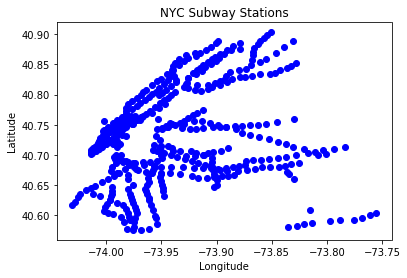

In [18]:
plt.plot(X, Y, 'bo')
plt.title('NYC Subway Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Let's see if we can use KMeans Clustering to "learn" the 5 boroughs. 

In [20]:
classifier = KMeans(n_clusters=5, n_init=20, max_iter=500, n_jobs=-1)
kmeans = classifier.fit(points) 

Let's take a look at what our classifier thinks. We'll add some color to differentiate the 5 categories. 

Text(0,0.5,'Latitude')

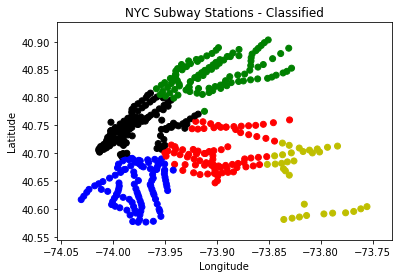

In [22]:
colors = [color for color in "rgbyk"]
plt.scatter(X, Y, c=[colors[label] for label in kmeans.labels_])
plt.title('NYC Subway Stations - Classified')
plt.xlabel('Longitude')
plt.ylabel('Latitude') 

The classifier did a reasonably good job of learning Manhattan(black) and the Bronx(green). A lot of Brooklyn(blue) was swallowed up in a Brooklyn/Queens hybrid(red). Apparently it's time to say goodbye to Staten Island and replace it with East Queens(yellow). 

In the future I'd like to try other clustering techniques, such as mean-shift or Gaussian mixtures. I'd also like to label the stations so that we can start getting some formal measure of error. 